In [3]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
import tensorflow as tf
import pandas as pd
     

In [4]:
data = pd.read_csv('IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [5]:
import nltk
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaishreeram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)
     

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
24711    [can, film, considered, film, imagine, situati...
33594    [the, charm, otto, preminger, grandiose, visio...
41858    [skeleton, man, okay, first, minutes, soon, ca...
4844     [i, saw, movie, theatre, terrible, movie, the,...
21435    [a, warning, potential, viewers, experimental,...
                               ...                        
49608    [it, rare, treat, see, checking, out, i, touch...
16383    [a, single, mom, son, daughter, hippie, chick,...
12666    [sigh, stupid, government, attempted, create, ...
3370     [this, film, tells, stories, several, couples,...
34450    [seeing, movie, always, reminds, i, remember, ...
Name: review, Length: 40000, dtype: object 

20503    [for, kind, words, film, i, suspect, see, rele...
25255    [possible, spoiler, madonna, plays, ex, con, n...
19141    [outside, household, different, world, family,...
44383    [i, agree, many, observers, traffik, one, memo...
41041    [when, opened, london, christmas, season, musi...
 

In [8]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
     


In [9]:
print(x_train)
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)
     

24711    [can, film, considered, film, imagine, situati...
33594    [the, charm, otto, preminger, grandiose, visio...
41858    [skeleton, man, okay, first, minutes, soon, ca...
4844     [i, saw, movie, theatre, terrible, movie, the,...
21435    [a, warning, potential, viewers, experimental,...
                               ...                        
49608    [it, rare, treat, see, checking, out, i, touch...
16383    [a, single, mom, son, daughter, hippie, chick,...
12666    [sigh, stupid, government, attempted, create, ...
3370     [this, film, tells, stories, several, couples,...
34450    [seeing, movie, always, reminds, i, remember, ...
Name: review, Length: 40000, dtype: object
Encoded X Train
 [[1320    4 1148 ...    0    0    0]
 [   2 1355 6639 ...  473 6273  124]
 [5787   52  693 ...    0    0    0]
 ...
 [7684  265 1174 ... 3180 2033  425]
 [   8    4  616 ...    0    0    0]
 [ 218    3  124 ...    0    0    0]] 

Encoded X Test
 [[ 204  147  551 ...    0    0    0]
 [ 530 1

In [10]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import plot_model


# Define the architecture
EMBED_DIM = 32
LSTM_OUT = 64

# Create the model
model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length=max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Build the model
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Plot the model architecture
plot_model(model, to_file='modelLSTM_1.png')

# Print the model summary
print(model.summary())

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


/Users/jaishreeram/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 130, 32)        │     2,959,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,988,481 (11.40 MB)

 Trainable params: 2,988,481 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
checkpoint = ModelCheckpoint(
    'LSTM/LSTM_2.keras',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)
     

In [12]:


model.fit(x_train, y_train, batch_size = 128, epochs = 8, callbacks=[checkpoint])

Epoch 1/8
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5168 - loss: 0.6912
Epoch 1: accuracy improved from -inf to 0.54555, saving model to LSTM/LSTM_2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.5169 - loss: 0.6911
Epoch 2/8
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6803 - loss: 0.5839
Epoch 2: accuracy improved from 0.54555 to 0.63823, saving model to LSTM/LSTM_2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.6800 - loss: 0.5841
Epoch 3/8
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5979 - loss: 0.6391
Epoch 3: accuracy improved from 0.63823 to 0.64950, saving model to LSTM/LSTM_2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.5982 - loss: 0.6388
Epoch 4/8
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7351 - loss: 0.5150
Epoch 4: accuracy improved from 0.64950 to 0.73115, saving model to LSTM/LSTM_2.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.7351 - loss: 0.5151
Epoch 5

In [13]:
# Predict probabilities
y_pred_prob = model.predict(x_test, batch_size=128)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute the number of correct predictions
true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

# Print results
print('Correct Predictions: {}'.format(true))
print('Wrong Predictions: {}'.format(len(y_pred) - true))
print('Accuracy: {:.2f}%'.format(true / len(y_pred) * 100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Correct Predictions: 8356
Wrong Predictions: 1644
Accuracy: 83.56%


In [14]:
loaded_model = load_model('LSTM/LSTM_2.keras')

In [15]:
review = str(input('Movie Review: '))

Movie Review: Nothing was typical about this. Everything was beautifully done in this movie, the story, the flow, the scenario, everything. I highly recommend it for mystery lovers, for anyone who wants to watch a good movie!


In [16]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  Nothing was typical about this Everything was beautifully done in this movie the story the flow the scenario everything I highly recommend it for mystery lovers for anyone who wants to watch a good movie
Filtered:  ['nothing typical everything beautifully done movie story flow scenario everything i highly recommend mystery lovers anyone wants watch good movie']


In [17]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)
     

[[  76  682  173 1227  127    3   15 2676 2622  173    1  441  282  685
  1722  152  397   33    9    3    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]


In [18]:
result = loaded_model.predict(tokenize_words)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[0.9054457]]


In [19]:

if result >= 0.7:
    print('positive')
else:
    print('negative')

positive


In [20]:

from transformers import BertTokenizer, TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
loaded_model = load_model('LSTM/LSTM_2.keras')

In [35]:
biden_df = pd.read_csv('cleaned_sample_100_biden.csv')
trump_df = pd.read_csv('cleaned_sample_100_trump.csv')

In [36]:
biden_df.loc[:,'who'] = 'biden'
trump_df.loc[:,'who'] = 'trump'

balance_data_df = pd.DataFrame(columns=trump_df.columns)
balance_data_df

,tweet,long,lat,state_code,sentiment,who


In [37]:
states_list = set(biden_df['state_code']).union(set(trump_df['state_code'])) - set(['MP', 'GU', 'PR', 'VI', 'AS', 'UM', ])
     

In [38]:
for state in states_list:
    trump_df_state = trump_df[trump_df['state_code']==state]
    biden_df_state = biden_df[biden_df['state_code']==state]
    
    n_sample = len(trump_df_state) if len(trump_df_state) < len(biden_df_state) else len(biden_df_state)
    
    if len(trump_df_state) < len(biden_df_state):
        balance_data_df = pd.concat([balance_data_df, trump_df_state])
        balance_data_df = pd.concat([balance_data_df, biden_df_state.sample(len(trump_df_state))])
    else:
        balance_data_df = pd.concat([balance_data_df, biden_df_state])
        balance_data_df = pd.concat([balance_data_df, trump_df_state.sample(len(biden_df_state))])

In [39]:
balance_data_df

,tweet,long,lat,state_code,sentiment,who
40,Trump,-79.142246,37.413754,VA,0,biden
53,"Trump sues for Michigan ballot access, asks Wi...",-76.411419,36.950755,VA,0,biden
79,"Biden2020 will win the popular vote, but bewar...",-77.447943,38.793099,VA,0,biden
94,VoteRedToSaveAmerica2020 MAGA2020 Trump,-78.492772,37.123224,VA,0,biden
260,American Democracy will Survive 2020 Democrac...,-78.492772,37.123224,VA,0,biden
...,...,...,...,...,...,...
12043,"As I watch the news and stories about Trump, I...",-88.732158,45.189585,WI,0,trump
20562,JohnJwirenius MonicaHesse Gorgeous piece hitti...,-89.688464,44.430898,WI,0,trump
22789,realDonaldTrump THIS GUY SAYS STOP THE COUNT F...,-89.688464,44.430898,WI,0,trump
25430,"Arizona, Nevada, Wisconsin, Michigan and Maine...",-89.688464,44.430898,WI,0,trump


In [40]:
batch_size = 100

In [41]:
from tqdm.auto import tqdm
import tensorflow as tf

def emotion_classify(tweet_list):
    batch_idx = np.append(np.arange(0, len(tweet_list), batch_size), len(tweet_list))
    labels = np.array([])
    for i in tqdm(range(len(batch_idx)-1)):
        tf_batch = tokenizer(tweet_list[batch_idx[i]:batch_idx[i+1]], max_length=280, padding=True, truncation=True, return_tensors='tf')
        tf_outputs = model(tf_batch)
        tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
        labels = np.append(labels, tf.argmax(tf_predictions, axis=1))
#         labels = np.append(labels, tf_predictions[:,1])
        del tf_batch
    return labels
     

In [43]:
balance_data_df['sentiment'] = emotion_classify(list(balance_data_df['tweet']))


  0%|          | 0/197 [00:00<?, ?it/s]

In [44]:

balance_data_df.to_csv('LSTM/balance_data_with_sentiments.csv', index=False, header=True)

balance_data_df.head()

,tweet,long,lat,state_code,sentiment,who
40,Trump,-79.142246,37.413754,VA,1.0,biden
53,"Trump sues for Michigan ballot access, asks Wi...",-76.411419,36.950755,VA,1.0,biden
79,"Biden2020 will win the popular vote, but bewar...",-77.447943,38.793099,VA,1.0,biden
94,VoteRedToSaveAmerica2020 MAGA2020 Trump,-78.492772,37.123224,VA,1.0,biden
260,American Democracy will Survive 2020 Democrac...,-78.492772,37.123224,VA,1.0,biden


In [45]:
dem_states = set(['DC', 'VT', 'HI', 'MA', 'MD', 'CA', 'NY', 'RI', 'DE', 
                 'CT', 'WA', 'ME', 'NJ', 'OR', 'IL'])
rep_states = set(['OH', 'IA', 'TX', 'MT', 'SC', 'AK', 'MO', 'IN', 'NE',
                 'KS', 'UT', 'MS', 'TN', 'SD', 'KY', 'LA', 'AL', 'ND',
                 'ID', 'AR', 'OK', 'WV', 'WY'])
swing_states = states_list - dem_states - rep_states
     

In [46]:
electoral_vote_by_state = pd.read_csv('/Users/jaishreeram/Desktop/DS/electrol_votes.csv')

In [47]:
states_results = pd.DataFrame(columns=['state_code', 'biden', 'trump', 'type', 'winner'])
     

In [48]:
states_results.loc[:,'state_code'] = electoral_vote_by_state['Abb_State']
states_results.loc[:,'e_vote'] = electoral_vote_by_state['Electoral_College_Votes']

In [49]:
type_vs_candidate = {'blue': 'biden', 'red': 'trump', 'purple': 'contentious'}
threshold = 1.15
for state in states_list:
    trump_slice = balance_data_df.query(f'state_code == "{state}" and who == "trump"')
    biden_slice = balance_data_df.query(f'state_code == "{state}" and who == "biden"')
    trump_score = np.sum(trump_slice['sentiment']) + 1
    biden_score = np.sum(biden_slice['sentiment']) + 1
    
    state_type = ''
    if state in dem_states:
        state_type = 'blue'
    elif state in rep_states:
        state_type = 'red'
    else:
        state_type = 'purple'
        
    winner = ''
    if len(trump_slice) + len(biden_slice) < 1000:
        winner = type_vs_candidate[state_type]
    else:
        if trump_score/biden_score > threshold:
            winner = 'trump'
        elif biden_score/trump_score > threshold:
            winner = 'biden'
        else:
            winner = 'contentious'
        
    states_results.loc[states_results['state_code'] == state, ['biden', 'trump', 'type', 'winner']] = \
        [biden_score, trump_score, state_type, winner]

In [50]:
states_results.query('winner=="contentious"')

,state_code,biden,trump,type,winner,e_vote
2,AZ,185.0,173.0,purple,contentious,11
4,CA,1630.0,1491.0,blue,contentious,55
5,CO,170.0,156.0,purple,contentious,9
9,FL,820.0,767.0,purple,contentious,29
10,GA,202.0,183.0,purple,contentious,16
22,MI,203.0,185.0,purple,contentious,16
23,MN,119.0,109.0,purple,contentious,10
28,NV,145.0,134.0,purple,contentious,6
29,NH,33.0,30.0,purple,contentious,4
31,NM,36.0,32.0,purple,contentious,5


In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt

us_shape = gpd.read_file('/Users/jaishreeram/Desktop/DS/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
us_shape = us_shape[['STUSPS', 'geometry']]
states_results_tmp = states_results.copy()
states_results_tmp = states_results_tmp.merge(us_shape, left_on='state_code', right_on='STUSPS')
states_results_tmp.drop(['STUSPS'], axis=1, inplace=True)
states_results_tmp = gpd.GeoDataFrame(states_results_tmp)

states_results_tmp.columns
     

Index(['state_code', 'biden', 'trump', 'type', 'winner', 'e_vote', 'geometry'], dtype='object')

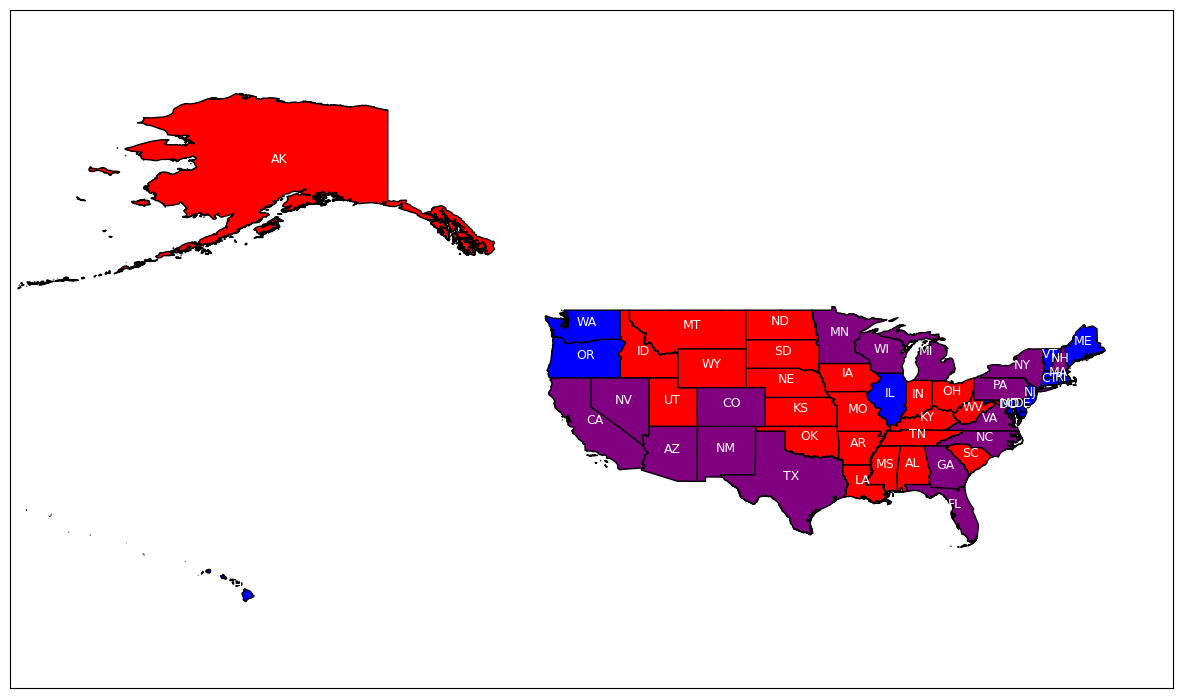

In [54]:

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Annotate state codes
for _, row in states_results_tmp.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    ax.annotate(
        text=row['state_code'],  # The text to display
        xy=(x, y),  # Coordinates of the centroid
        ha='center',  # Horizontal alignment
        fontsize=9,  # Font size
        color='white'  # Text color
    )

# Plot states based on winner
states_results_tmp[states_results_tmp['winner'] == 'trump'].plot(ax=ax, color='red', edgecolor='black')
states_results_tmp[states_results_tmp['winner'] == 'biden'].plot(ax=ax, color='blue', edgecolor='black')
states_results_tmp[states_results_tmp['winner'] == 'contentious'].plot(ax=ax, color='purple', edgecolor='black')

# Set plot options
plt.axis('square')
ax.set_xlim([-180, -60])
ax.set_ylim([10, 80])
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [55]:
states_results.to_csv('state_results_LSTM.csv', index=False, header=True)
fig.savefig('state_results_LSTM.png')

In [56]:
trump_vote = np.sum(states_results[states_results['winner'] == 'trump']['e_vote'])
biden_vote = np.sum(states_results[states_results['winner'] == 'biden']['e_vote'])
print(trump_vote, biden_vote)

150 102


In [57]:
import itertools

In [58]:
states_results = pd.read_csv('state_results_LSTM.csv')

In [59]:
num_vote_to_win = 270
trump_vote = np.sum(states_results[states_results['winner'] == 'trump']['e_vote'])
biden_vote = np.sum(states_results[states_results['winner'] == 'biden']['e_vote'])
print(trump_vote, biden_vote)

150 102


In [60]:
contentious_states = states_results.loc[states_results['winner'] == 'contentious',['state_code', 'e_vote']]
contentious_states

,state_code,e_vote
2,AZ,11
4,CA,55
5,CO,9
9,FL,29
10,GA,16
22,MI,16
23,MN,10
28,NV,6
29,NH,4
31,NM,5


In [61]:
def predict_winner(states, win_lose):
    trump_cont_vote = trump_vote + np.sum(states.iloc[np.where(np.array(win_lose) == 1)[0]]['e_vote'])
    biden_cont_vote = biden_vote + np.sum(states.iloc[np.where(np.array(win_lose) == 0)[0]]['e_vote'])
    

#     print(trump_cont_vote, biden_cont_vote)
    
    if trump_cont_vote >= num_vote_to_win:
        return 1
    elif biden_cont_vote >= num_vote_to_win:
        return 0
    else:
        return None

In [62]:
get_bin = lambda x, n: format(x, 'b').zfill(n)

In [63]:
total = 0
n_bits = len(contentious_states)
n_possible_scenarios = 2**n_bits
draw = 0
for i in range(n_possible_scenarios):
    win_lose = list(map(int, get_bin(i, n_bits)))
    
    winner = predict_winner(contentious_states, win_lose)
    if winner != None:
        total += winner
    else:
        draw += 1

In [64]:
trump_chance_to_win = total/(n_possible_scenarios)
draw_chance = draw/n_possible_scenarios
biden_chance_to_win = 1 - draw_chance - trump_chance_to_win

In [65]:
print(trump_chance_to_win*100, biden_chance_to_win*100, draw_chance*100)

68.9971923828125 30.2032470703125 0.799560546875


In [66]:
win_chance_dict = dict({'candidate': ['trump', 'biden', 'draw'],
                        'chance_to_win': [f'{trump_chance_to_win*100:.5f}',
                                          f'{biden_chance_to_win*100:.5f}',
                                          f'{draw_chance*100:.5f}']
                       })
win_chance_dict

{'candidate': ['trump', 'biden', 'draw'],
 'chance_to_win': ['68.99719', '30.20325', '0.79956']}

In [67]:
win_chance_df = pd.DataFrame(win_chance_dict)
win_chance_df.to_csv('win_chance_state_results_LSTM.csv', index=False, header=True)

In [71]:
win_chance_df.head()

,candidate,chance_to_win
0,trump,68.99719
1,biden,30.20325
2,draw,0.79956
